In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.interpolate
import scipy.stats
import os

In [2]:
folder = '../'

In [109]:
pe = pd.read_csv(os.path.join(folder, 'photoexcited_particles.csv'),
                 sep=' ', names=['id', 'x', 'y', 'Ei'], header=0)
pe['x'] *= 1e9
pe['y'] *= 1e9

em = pd.read_csv(os.path.join(folder, 'emitted.csv'),
                 sep=' ', names=['id', 'time', 'Ef'], header=0)
em['time'] *= 1e12

df = em.merge(pe, on='id')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b382f6d8>]], dtype=object)

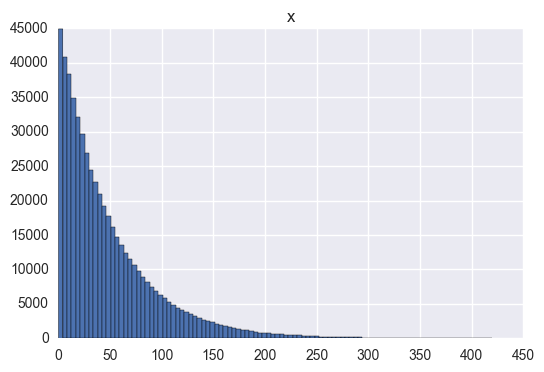

In [110]:
pe.hist('x', bins=100)

In [111]:
potential = pd.read_csv(os.path.join(folder, 'potential000.xyz'),
                        sep=' ', names=['x', 'y', 'V'], header=0)
band = potential[potential.y==0.1][['x']].copy()
band['V'] = potential[potential.y==0.1].V * -1
band['V'] += np.abs(band.iloc[0].V)
band['x'] *= 1e3
band_around = scipy.interpolate.interp1d(band.x, band.V, bounds_error=False, fill_value=0.)

In [113]:
band_around(df.x.min()) + (5 - 3.393 - 2 * 0.092) - 3.18

-0.12404443359999995

In [57]:
params = scipy.stats.gamma.fit(df.x)
params

(2.3326075117599547, 23.155486008201272, 14.83629400940163)

In [74]:
lparams = scipy.stats.levy.fit(df.x)
lparams

(23.032745721117884, 21.377832107755395)

In [82]:
rparams = scipy.stats.rayleigh.fit(df.x)
rparams

(19.15554313449913, 32.534674013648171)

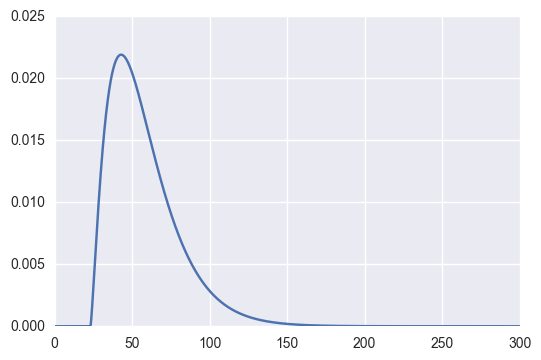

In [60]:


plt.plot(xx, g.pdf(xx))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b28c2e10>], dtype=object)

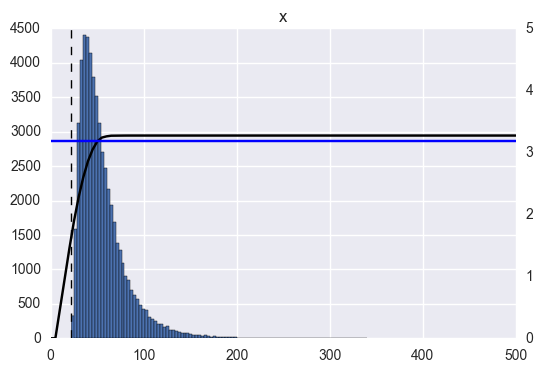

In [115]:
fig, ax  = plt.subplots()
ax2 = ax.twinx()
band.plot('x', 'V', ax=ax2, c='k', grid=False, legend=False, ylim=(0, 5))
ax.axvline(df.x.min(), c='k', ls='--', lw=1)
# ax2.axhline(band_around(df.x.min()) + (5 - 3.393 - 2 * 0.092), ls='--')
# ax2.axhline(band_around(45) + (5 - 3.393 - 16 * 0.092), ls='--')
ax2.axhline(3.18)
# ax.axvline(band[band.V >= band.V.max() * 0.9].x.iloc[0], c='k', ls=':', lw=2)
df.hist('x', bins=100, ax=ax)

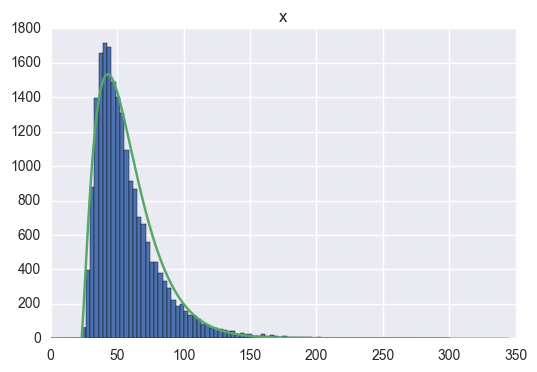

In [89]:
df.hist('x', bins=100)

gamma = scipy.stats.gamma(*params)
xx = np.arange(0, 300, 0.01)
plt.plot(xx, gamma.pdf(xx) * 70000)

In [5]:


tr = pd.read_csv(os.path.join(folder, 'tracking.csv'),
                 sep=' ', names=['id', 'time', 'x', 'E', 'Enorm', 'valley'], header=0)
tr['x'] *= 1e9
tr['time'] *= 1e12

FileNotFoundError: File b'tracking.csv' does not exist

In [5]:
# id     time          Ef
# 19602  2.827000e-12  11.365485
# 19598  3.033000e-12  10.242823
# 19592  3.306000e-12   8.741567
# 19590  3.886000e-12  66.031185
# 19587  4.102000e-12  15.652514
# 19585  4.439000e-12  30.732345
# 19583  4.560000e-12   7.542221
# 19581  4.729000e-12  15.567607


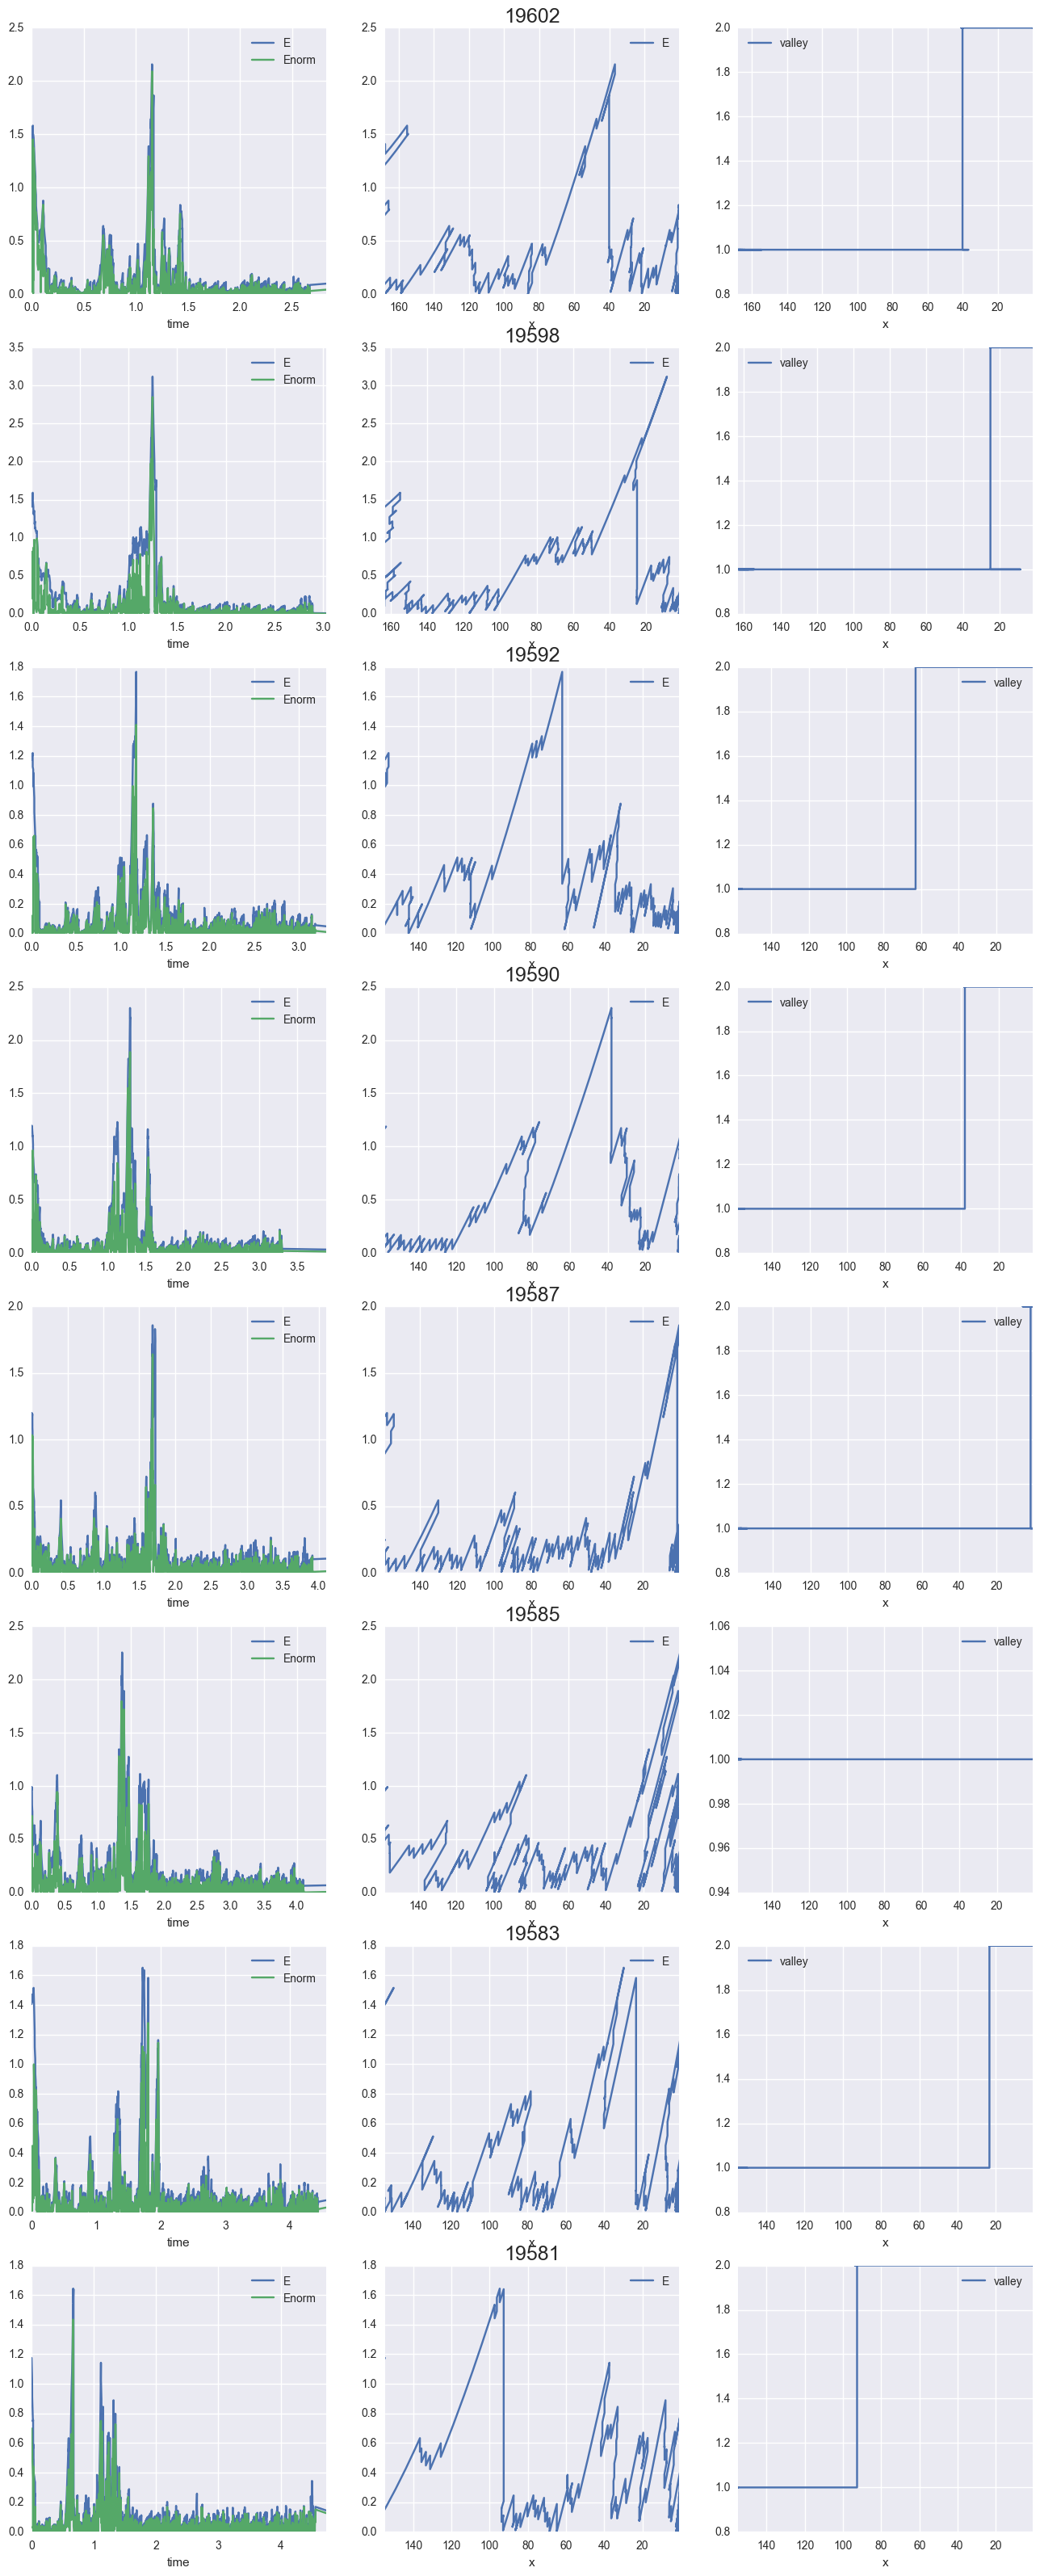

In [8]:
pids = [19602, 19598, 19592, 19590, 19587, 19585, 19583, 19581]
fig, axes = plt.subplots(len(pids), 3, figsize=(16, 40))
for pid, ax in zip(pids, axes):
    tmp = tr[tr.id==pid]
    tmp.plot(x='time', y=['E', 'Enorm'], ax=ax[0])
    tmp.plot(x='x', y=['E'], ax=ax[1])
    tmp.plot(x='x', y='valley', ax=ax[2])
    ax[1].set_title(pid, fontsize=18)

In [9]:
valley_energy = [0.0, 0.0, 1.34, 2.14]
tr['adjE'] = tr.E + [valley_energy[_] for _ in tr.valley]
tr['adjEnorm'] = tr.Enorm + [valley_energy[_] for _ in tr.valley]

In [10]:
def band_around(x):
    return band[band.x>=x].iloc[0].V

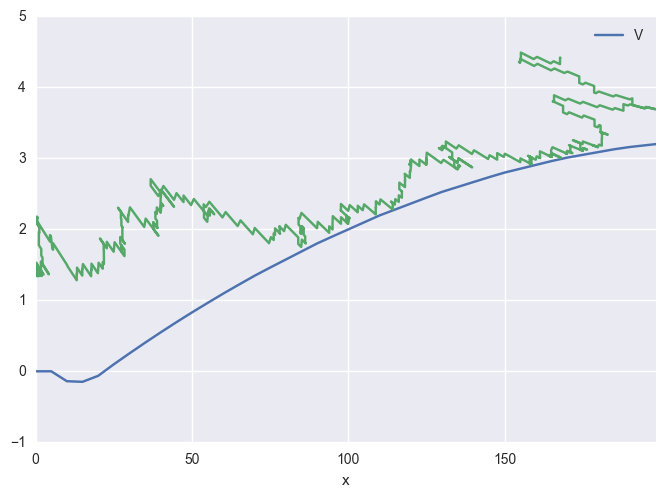

In [11]:
xx = tr[tr.id==19602].x
yy = tr[tr.id==19602].adjE + [band_around(_) for _ in xx]

fig, ax = plt.subplots(1, 1)
band.plot(x='x', y='V', ax=ax, xlim=(0, xx.max()))
ax.plot(xx, yy)

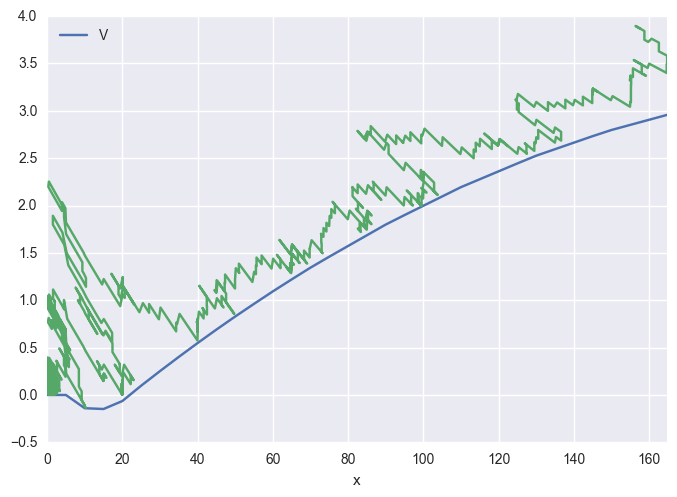

In [12]:
xx = tr[tr.id==19585].x
yy = tr[tr.id==19585].adjE + [band_around(_) for _ in xx]

fig, ax = plt.subplots(1, 1)
band.plot(x='x', y='V', ax=ax, xlim=(0, xx.max()))
ax.plot(xx, yy)

In [20]:
tr[(tr.id==19602) & (tr.time > 2.66)][['time', 'x', 'E', 'valley']]

,time,x,E,valley
37350,2.66052,1.348890,0.009269,2
37351,2.66052,1.348890,0.009269,2
37363,2.66100,1.346890,0.009410,2
37364,2.66187,1.325190,0.010932,2
37365,2.66187,1.325190,0.010932,2
37381,2.66200,1.327420,0.010775,2
37389,2.66300,1.327040,0.010802,2
37403,2.66400,1.295860,0.012989,2
37417,2.66500,1.233890,0.017334,2
37418,2.66548,1.193100,0.020195,2


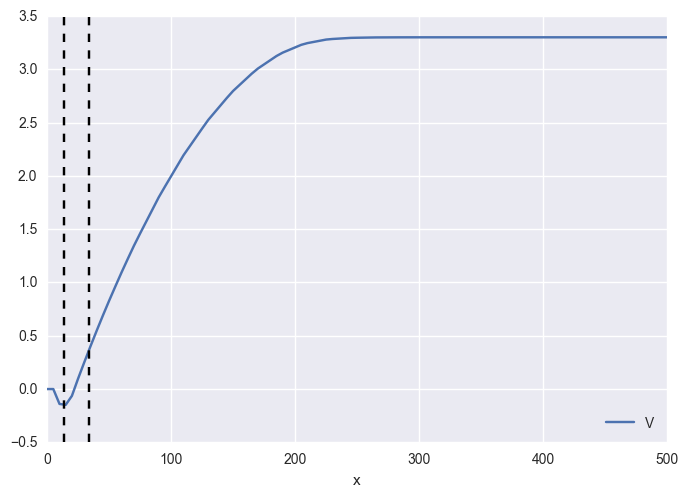

In [11]:
band.plot(x='x', y='V')
plt.axvline(x=13.79, linestyle='--', color='k')
plt.axvline(x=33.79, linestyle='--', color='k')

In [37]:
band.V.max() - band.V.iloc[0]

3.3008999999999999